In [896]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize =1
        
        self.hiddenLayerSize =3
        self.hiddenLayer2Size = 5
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
#         self.W3=np.random.rand(self.hiddenLayer2Size, self.outputLayerSize)
        
    def updateHiddenLayer(self):
        
        self.W1=np.random.rand(self.inputLayerSize, self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize, self.hiddenLayer2Size)
        self.W3=np.random.rand(self.hiddenLayer2Size, self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def forward_relu(self,X): ###added for q2: relu
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        
        ##did u have to add the following lines
        self.a3 = self.relu(self.z3)
        self.z4 = np.dot(self.a3,self.W3)
        
        yHat = self.sigmoid(self.z4) # and modify to be z4
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunction_relu(self, X, y): ###added for q2: relu
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward_relu(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    
    def costFunctionPrime_relu(self, X, y): ###added for q2: relu
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward_relu(X)
        
        delta3 = np.multiply(-(y-self.yHat),self.reluPrime(self.z4))
        dJdW3=np.dot(self.a3.T,delta3)
        
        delta2=np.dot(delta3,self.W3.T)*self.reluPrime(self.z3)
        dJdW2=np.dot(self.a2.T,delta2)
        
        delta1 = np.dot(delta2,self.W2.T)*self.reluPrime(self.z2)
        djdW1 = np.dot(X.T, delta1)
        return dJdW1, dJdW2, dJdW3
    

In [897]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [898]:
X


array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [899]:
y

array([[75.],
       [80.],
       [93.]])

In [900]:
X=X/np.amax(X,axis=0)
y=y/100

In [901]:
X,y


(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

In [902]:
NN=Neural_Network()

In [903]:
yH=NN.forward(X)

In [904]:
yH

array([[0.7078121 ],
       [0.67949334],
       [0.69384554]])

In [905]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

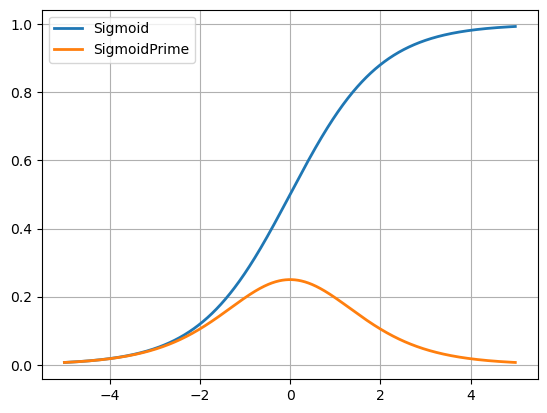

In [906]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])

In [907]:
NN=Neural_Network()

In [908]:
cost1=NN.costFunction(X,y)

In [909]:
cost1

array([0.0547953])

In [910]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [911]:
dJdW1

array([[-6.56404260e-05, -4.48208016e-03, -1.32156482e-02],
       [-3.18804021e-05, -2.02927257e-03, -5.96197260e-03]])

In [912]:
dJdW2

array([[-0.08267078],
       [-0.07866174],
       [-0.0800703 ]])

In [913]:
scalar=1
NN.W1 = NN.W1+scalar*dJdW1
NN.W2 = NN.W2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print (cost1,cost2)

[0.0547953] [0.07705557]


In [914]:
scalar=0.1
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost3 = NN.costFunction(X,y)
print (cost2,cost3)

[0.07705557] [0.07459233]


312


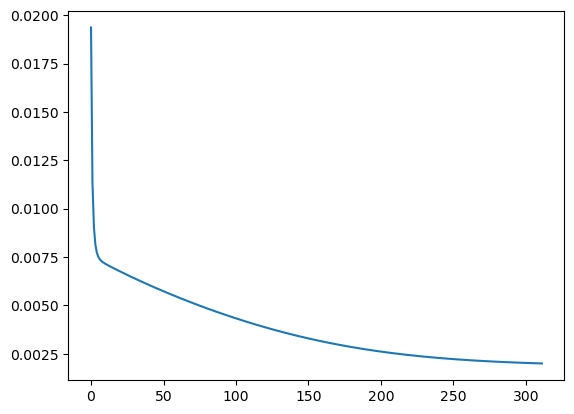

In [915]:
###Q1
NN1 = Neural_Network()
NN2 = Neural_Network()

def min_cost(net, scalar):
    cost_history = []
    iterations = 0
    cost = 100
    while cost > 0.002:
        dJdW1, dJdW2 = net.costFunctionPrime(X, y)
        net.W1 = net.W1 - scalar * dJdW1
        net.W2 = net.W2 - scalar * dJdW2
        cost = net.costFunction(X, y)
        cost_history.append(cost)
        iterations += 1
    
    plt.plot(cost_history)
    print(iterations)
    return iterations
    
    
nn1_iter = min_cost(NN1, 3)

76


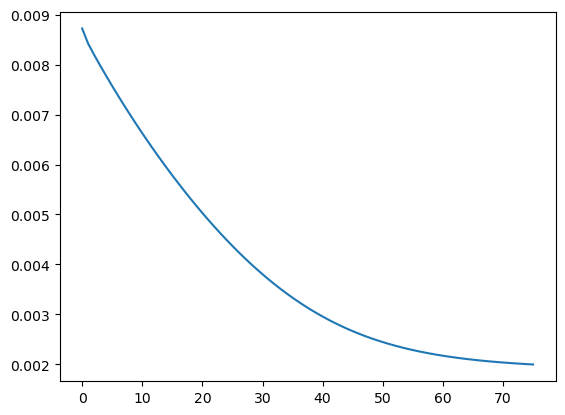

In [916]:
# using a bigger scalar
nn2_iter = min_cost(NN2, 10)

In [917]:
print("low scalar cost iterations: " + str(nn1_iter) + ", vs high scalar cost iterations: " + str(nn2_iter))

low scalar cost iterations: 312, vs high scalar cost iterations: 76


16
low scalar cost iterations: 312, vs high scalar cost iterations: 76, vs relu+extra hidden layer cost iterations: 16


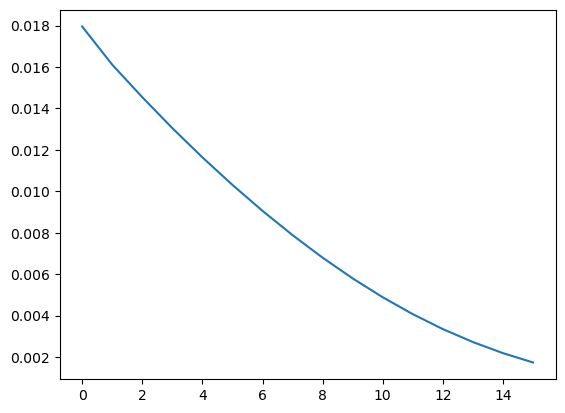

In [918]:
###2

NN3 = Neural_Network()
NN3.updateHiddenLayer() #Adds a new hidden layer of size 5

cost_history3 = []
iterations = 0

cost = 100
while cost > 0.002:
    scalar = 1.0
    dJdW1, dJdW2, dJdW3 = NN3.costFunctionPrime_relu(X, y)
    NN3.W1 = NN3.W1 - scalar * dJdW1
    NN3.W2 = NN3.W2 - scalar * dJdW2
    NN3.W3 = NN3.W3 - scalar * dJdW3
    cost = NN3.costFunction_relu(X, y)
    cost_history3.append(cost)
    iterations += 1
#     print(cost)
    
plt.plot(cost_history3)
print(iterations)
print("low scalar cost iterations: " + str(nn1_iter) + ", vs high scalar cost iterations: " + str(nn2_iter) + ", vs relu+extra hidden layer cost iterations: " + str(iterations))

In [919]:
###3

X = np.array(([3,5],[5,1],[10,1]), dtype=float)
y = np.array(([75],[80],[93]), dtype=float)

X = X/np.amax(X, axis=0)
y = y/100
X,y

(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

In [920]:
theta1 = [NN1.W1, NN1.W2]
theta2 = [NN2.W1, NN2.W2]
theta1, theta2

([array([[ 1.35674417,  1.19313583,  1.35438335],
         [ 0.01629538, -0.85622134, -0.70723645]]),
  array([[0.48873979],
         [1.1461126 ],
         [0.98563569]])],
 [array([[ 1.01711916,  1.3197945 ,  0.77892765],
         [-0.84638904, -0.5979959 ,  0.60483577]]),
  array([[1.28673125e+00],
         [1.43597041e+00],
         [8.15560182e-04]])])

In [921]:
time = np.arange(0,1.001,0.05)

whatlist = []
for i in time:
    what1 = (1-i)*theta1[0] + i*theta2[0] ### w_hat_1 = (1-time)*NN1.W1 + time*NN2.W1
    what2 = (1-i)*theta1[1] + i*theta2[1] ### w_hat_2 = (1-time)*NN1.W2 + time*NN2.W2
    what = [what1, what2] ### [(1-time)*NN1.W1 + time*NN2.W1, (1-time)*NN1.W2 + time*NN2.W2]
    whatlist.append(what)
    
whatlist

[[array([[ 1.35674417,  1.19313583,  1.35438335],
         [ 0.01629538, -0.85622134, -0.70723645]]),
  array([[0.48873979],
         [1.1461126 ],
         [0.98563569]])],
 [array([[ 1.33976292,  1.19946876,  1.32561057],
         [-0.02683884, -0.84331007, -0.64163284]]),
  array([[0.52863936],
         [1.16060549],
         [0.93639468]])],
 [array([[ 1.32278167,  1.2058017 ,  1.29683778],
         [-0.06997306, -0.83039879, -0.57602923]]),
  array([[0.56853893],
         [1.17509838],
         [0.88715368]])],
 [array([[ 1.30580041,  1.21213463,  1.268065  ],
         [-0.11310728, -0.81748752, -0.51042562]]),
  array([[0.60843851],
         [1.18959128],
         [0.83791267]])],
 [array([[ 1.28881916,  1.21846756,  1.23929221],
         [-0.1562415 , -0.80457625, -0.44482201]]),
  array([[0.64833808],
         [1.20408417],
         [0.78867166]])],
 [array([[ 1.27183791,  1.2248005 ,  1.21051942],
         [-0.19937572, -0.79166498, -0.37921839]]),
  array([[0.68823765],
     

In [922]:
tempnet = Neural_Network()

costs = []
iterations = np.arange(0, len(time))

for i in range(len(time)):
    tempnet.W1 = whatlist[i][0]
    tempnet.W2 = whatlist[i][1]
    cost = tempnet.costFunction(X, y)
    costs.append(cost)

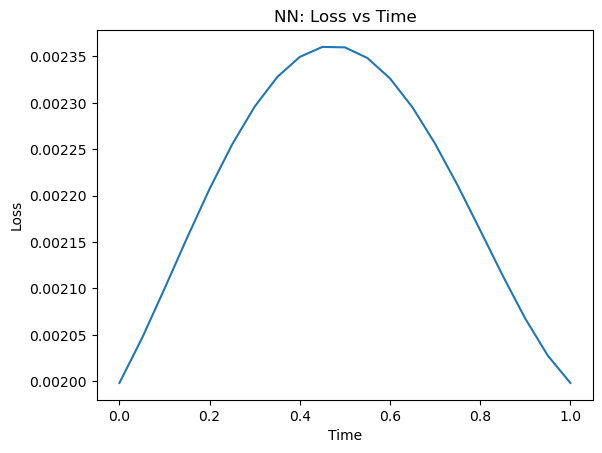

In [923]:
plt.plot(time, costs);
plt.title("NN: Loss vs Time")
plt.xlabel("Time");
plt.ylabel("Loss");

In [924]:
tempnet = Neural_Network()
def lossgradient(p):
    tempnet.W1, tempnet.W2 = p
    return tempnet.costFunctionPrime(X, y)

def energyprime(i, k):
    gradient1, gradient2 = lossgradient(p[i])
    return gradient1 - k * (p[i+1][0] - p[i][0]), gradient2 - k * (p[i+1][1] - p[i][1])

In [925]:
p = whatlist # initialize path from Question 1
k = 1 # spring force constant
lr = 1 # learning rate
num_iterations = 0

while(True):
    try:
        for a in range(1, len(p)-1):
            gradient1, gradient2 = energyprime(num_iterations, k) #find gradient

            p[a][0] = p[a][0] - lr * gradient1 # update w1
            p[a][1] = p[a][1] - lr * gradient2 # update w2
    except:
        break
    num_iterations += 1
path = p

In [926]:
path_costs = []
for i in range(len(path)):
    tempnet.W1 = path[i][0]
    tempnet.W2 = path[i][1]
    cost = tempnet.costFunction(X, y)
    path_costs.append(cost)

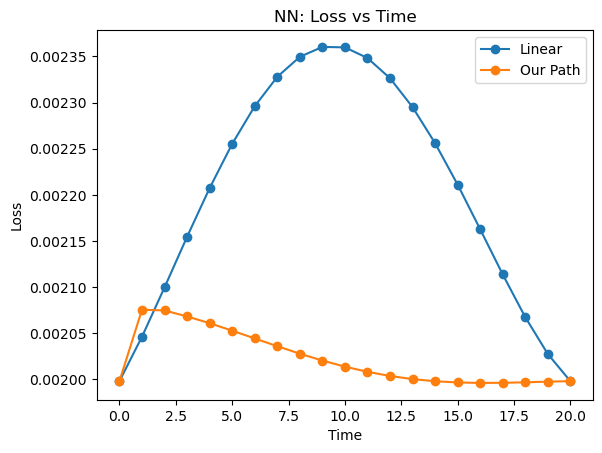

In [927]:
plt.plot(costs, marker='o', label='Linear')
plt.plot(path_costs, marker='o', label='Our Path');
plt.legend()
plt.title("NN: Loss vs Time")
plt.xlabel("Time");
plt.ylabel("Loss");